## MSBA 326:  PCA
Evan Uribe<br>
11/17/19


## PCA
1. Review the sample code for SVM & PCA and the example from Scikit-learn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) .
2. Use the wine dataset and perform multi-label classification using SVC (use one vs. others since SVC is a binary classification. Check out the code given at Scikit-learn documentation example: https://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py). Use an “RBF” classifier as your kernel. (similar to SVC homework)
3. Apply PCA on X values (input features only) first then use oneVsRestClassifier(). Hint: Check out the example in the link at step 3.
4. Compare the results of the classifier with and without PCA

Notes: look at inputs only, apply PCA to it and use PCA as input vs original. Calculate accuracy misclassification rate between oringal vs PCA. Note(PCA will perform a little worse)

In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
filename = ('~/Documents/workspace/ggu/data/Course Data/wine.csv')  
colnames = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 
                      'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                     'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine = read_csv(filename, names=colnames)

features = ['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']

x = wine.loc[:, features].values
y = wine.loc[:,['class']].values
target = wine['class']

wine.head(3)


,class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [3]:
from time import time

names = []
results = []
models= []

# evaluate each model in turn
# cross_val_score helper function that will iterate over 10 folds (specified) 
def getAccuracy(models, X, Y):
    
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)  
        start = time()
        cv_results = cross_val_score(model, X, Y, cv=kfold, 
                    scoring='accuracy') #https://scikit-learn.org/stable/modules/model_evaluation.html
                                
        end = time()
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f) <time=%f>" % (name, cv_results.mean(), cv_results.std(), end - start))   
    

In [4]:
# boxplot algorithm comparison
def comparePlot():
    fig = pyplot.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.show()

In [5]:
wine.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

## determine min components that explains most of the variability

In [6]:
from sklearn.preprocessing import StandardScaler

# standardize
std_wine= StandardScaler().fit_transform(wine)

non standardized dataset


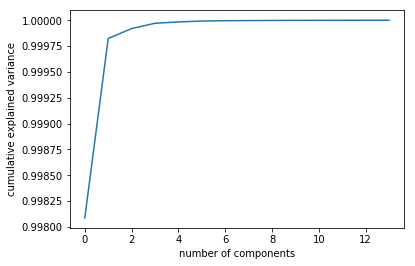

In [7]:
import matplotlib.pyplot as plt

print('non standardized dataset')
pca = PCA().fit(wine)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


over 99% of the variance is explained by PC 1

standardized


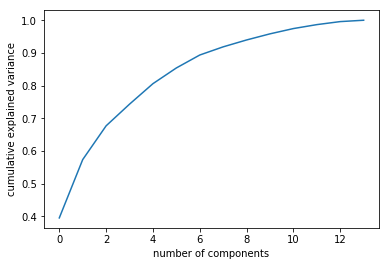

In [8]:
print('standardized')
pca = PCA().fit(std_wine)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Looks like 6 PC are needed to explain 85 % of the variation in the data.

In [9]:
def plotPca(datat):
    fig = plt.figure(figsize=(10,8))
    ax0 = fig.add_subplot(111)
    ax0.scatter(datat.T[0],datat.T[1])
    for l,c in zip((np.unique(target)),['red','green','blue']):
        ax0.scatter(datat.T[0,target==l],datat.T[1,target==l],c=c,label=l)
    ax0.legend()
    plt.show()

### components = 2

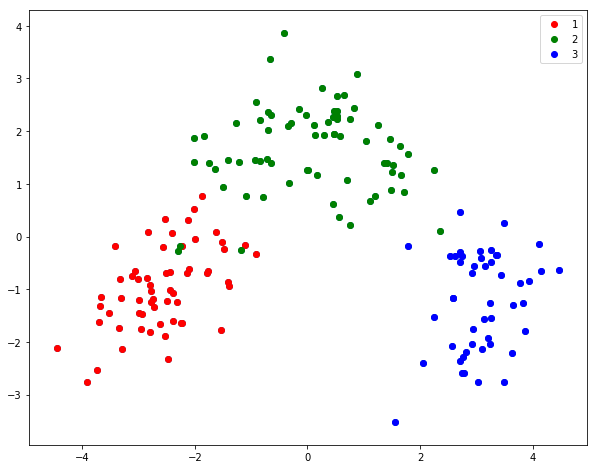

[0.39542486 0.17836259] 0.5737874490085584


In [10]:
pca = PCA(n_components=2,random_state=42) 
#pca.fit(x)
datat = pca.fit_transform(std_wine)
#print(pca.components_)
#print(pca.explained_variance_)
plotPca(datat)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())


The first 2 PC explains 57% of the variation.  Even though this is less than 85%, the wine classes are mostly separable

### components = 6

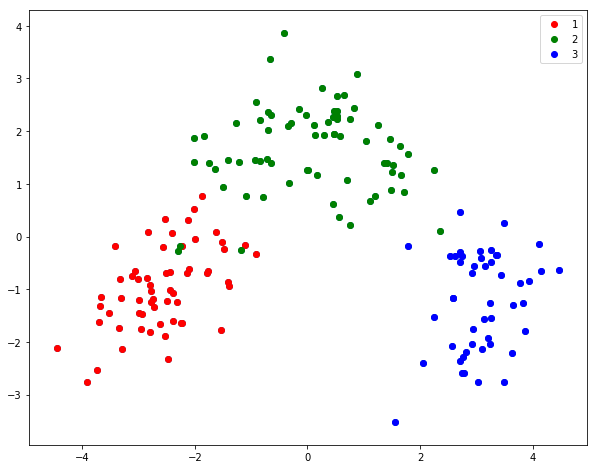

[0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556 ] 0.8540926568319015


In [11]:
pca = PCA(n_components=6,random_state=42) 
datat = pca.fit_transform(std_wine)
plotPca(datat)
print(pca.explained_variance_ratio_,pca.explained_variance_ratio_.sum())


The first  PC explains ~85% of the variation in the data.

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

names = []
#results = []
models = []

#models.append(('rbf', SVC(kernel = 'rbf', C=1.0, random_state=1))) # SVC Classifier

print('features: without PCA', x.shape)
clsf = OneVsRestClassifier(SVC(kernel='rbf', C=1.0, random_state=7))
models.append(('rbf w/o PCA', clsf)) 

getAccuracy(models, x, y)


features: without PCA (178, 13)
rbf w/o PCA: 0.178431 (0.188470) <time=0.120445>


In [13]:
#names = []
#results = []
models = []

X = PCA(n_components=2).fit_transform(x)
print('features: with PCA', X.shape)
clsf = OneVsRestClassifier(SVC(kernel='rbf', C=1.0, random_state=7))
models.append(('PCA-2', clsf)) 

getAccuracy(models, X, y)


features: with PCA (178, 2)
PCA-2: 0.122222 (0.175330) <time=0.104896>


In [14]:
#names = []
#results = []
models = []

X = PCA(n_components=6).fit_transform(x)
print('features: with PCA', X.shape)
clsf = OneVsRestClassifier(SVC(kernel='rbf', C=1.0, random_state=7))
models.append(('PCA-6', clsf)) 

getAccuracy(models, X, y)


features: with PCA (178, 6)
PCA-6: 0.139542 (0.201960) <time=0.108003>


- without PCA, mean accuracy is: 0.178431
- with PCA (n_components=2) mean accuracy is: 0.122222
- with PCA (n_components=6) mean accuracy is: 0.139542

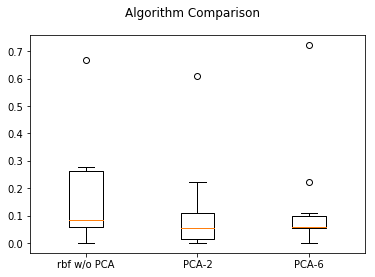

In [15]:
comparePlot()

Overall PCA performs worse than non-PCA due to loss from feature reduction.  As the numbere of components is increased, performance is also increased.

References<br>
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py<br>
https://scikit-learn.org/stable/modules/multiclass.html<br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html<br>
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60<br>
